# LIBRARIES

In [1]:
## import torch
import torchvision
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.nn import functional as F
import time
import pandas as pd 

# Pull in MNIST Data

## MNIST Data Label Generation

In [2]:
def gen_mnist():
    from sklearn.datasets.base import get_data_home 
    from sklearn.datasets import fetch_mldata
    print (get_data_home())
    mnist_raw = fetch_mldata('MNIST original', data_home=get_data_home())
    mnist=mnistData(mnist_raw.target,mnist_raw.data) 
    cnt=len(mnist.label)
    labelset=torch.tensor(mnist.label)
    labelset.shape
    dataset=torch.tensor(mnist.x,dtype=torch.float)
    number_columns=dataset.shape[1]
    dataset = dataset.view(-1,number_columns).float()/256.0
    print(dataset.shape)
    dataset=dataset.view(cnt,28,28)
    return(labelset, dataset)

# Classes

## Data Loaders

In [3]:
## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class rgenData(Dataset):
    def __init__(self, randEnc, x, transform=None):
        self.randEnc= randEnc
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        randEnc=self.randEnc[idx]
        x=self.x[idx]
        return randEnc, x

## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class mnistData(Dataset):
    def __init__(self, label, x, transform=None):
        self.label= label
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        label=self.label[idx]
        x=self.x[idx]
        return x

## Decoder 1L

In [4]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L(nn.Module):
    def __init__(self):
        super(Decoder_1L, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_1L = Decoder_1L()
optimizer = torch.optim.Adam(model_1L.parameters(), lr=LR)

## Decoder 2L

In [5]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_2L(nn.Module):
    def __init__(self):
        super(Decoder_2L, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 50)
        self.sig = nn.Sigmoid()
        self.fc5 = nn.Linear(50, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        out2=self.sig(out)
        out3=self.fc5(out2)
        out4=self.sig(out3)
        return out4
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_2L = Decoder_2L()
optimizer_2L = torch.optim.Adam(model_2L.parameters(), lr=LR)

## Decoder 1L6D

In [6]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1L6D(nn.Module):
    def __init__(self):
        super(Decoder_1L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(6, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model_1L6D = Decoder_1L6D()
optimizer = torch.optim.Adam(model_1L6D.parameters(), lr=LR)

## AE

In [7]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate

class AE_1L6D(nn.Module):
    def __init__(self):
        super(AE_1L6D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fw4 = nn.Linear(784, 6)
        self.bc4 = nn.Linear(6, 784)
        
    def encode(self, z):
        enc=self.fw4(z)
        return torch.sigmoid(enc)
        
    
    def decode(self, z):
        out=self.bc4(z)
        return torch.sigmoid(out)
    

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return encoded, decoded
### INITALIZE MODEL PARAMS
model_AE1 = AE_1L6D()
optimizer = torch.optim.Adam(model_AE1.parameters(), lr=LR)

# Functions

In [8]:
def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    return(BCE)
def decode_loader(data, batch_size):
    perm = torch.randperm(data.size(0))
    idx = perm[:batch_size]
    batch=data[idx]
    return(batch)

# Data Generation

## Pull Indices and Labels

In [9]:
def get_images(img_return_cnt,labels_raw, data_raw):
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                img_agg_cnt[index]+=1
                indices.append(i)
        i+=1
    return(indices)

## Gen Random Embeddings

In [10]:
def gen_rand_data(img_return_cnt,labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    first=True
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                labels.append(target.item())
                datum=data_raw[i].view(-1,28*28)
                img_agg_cnt[index]+=1
                indices.append(i)
                if first==True:
                    x_tensor=datum
                    randEnc_tensor=torch.rand(1, Rdim)
                    first=False 
                else:
                    omega=torch.rand(1, Rdim)
                    x_tensor=torch.cat((x_tensor,datum),0)
                    randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
        i+=1
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels, indices)

## Create RandEmbedding with Image Index

In [11]:
def get_randenc_byindex(indices, labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.rand(1, Rdim)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.rand(1, Rdim)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

## Gen Dataset Given Image Index & Array of Embedding

In [12]:
def get_enc_img(indices,labels_raw, data_raw,embedding):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.tensor(embedding[0], dtype=torch.float)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.tensor(embedding[i], dtype=torch.float)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

# Models

## 1L Model

In [13]:
def train_1L(epoch, data, size,log_interval=10):
    model_1L= Decoder_1L()
    optimizer = torch.optim.Adam(model_1L.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model_1L.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_1L)

## 2L Model

In [14]:
def train_2L(epoch, log_interval=10):
    model_2L= Decoder_2L()
    optimizer = torch.optim.Adam(model_2L.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        for batch_idx, (randEnc, x) in enumerate(train_loader):
            if i%200000==0:
                print(i)
            cnt+=1
            encoded, decoded = model_2L(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (len(train_loader.dataset)*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt, model_2L)

## 1L6D Model

In [15]:
def train_1L6D(epoch, data, size,log_interval=10):
    model_1L6D= Decoder_1L6D()
    optimizer = torch.optim.Adam(model_1L6D.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model_1L6D.forward(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_1L6D)

## AE1L6D Model

In [16]:
def train_AE1(epoch, data, size,log_interval=10):
    model_AE1 = AE_1L6D()
    optimizer = torch.optim.Adam(model_AE1.parameters(), lr=LR)
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    encoding=[]
    for i in range(1, epoch):
        if i%100000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model_AE1.forward(x)
            encoding.append(encoded)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (size*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt,model_AE1)

# Plotting

In [17]:
def x_xd_plot_compare(data,model,instances): 
    rows=instances
    cols=2
    Rdim=data[0][0].shape
    Rdim=Rdim[0]
    tot=int(instances)*cols
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        # linear
        loc+=1
        tensor=data[case][1].view(28,28)      
        tensor_d=model.decode(data[case][0])
        tensor_d=tensor_d.view(28,28)
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))


        if case==0:
            exp_tensor=data[case][1]
            exp_tensor_d=model.decode(data[case][0])
            exp_omega=data[case][0]
        else:
            exp_tensor=torch.cat((exp_tensor,data[case][1]),0)
            exp_tensor_d=torch.cat((exp_tensor_d,model.decode(data[case][0])),0)
            exp_omega=torch.cat((exp_omega, data[case][0]),0)
        case+=1

    plt.show()
    return(exp_tensor.view(instances,784),exp_tensor_d.view(instances,784),exp_omega.view(instances,Rdim))

# Experiments

## Import MNIST Data

In [21]:
labelset, dataset=gen_mnist()

C:\Users\clair\scikit_learn_data
torch.Size([70000, 784])


## Experiment #1- RandEnc and Select Images

### Run Code

In [15]:
img_return_cnt=np.zeros(10)
img_return_cnt[0]=2
img_return_cnt[1]=2
img_return_cnt[2]=0
img_return_cnt[3]=0
img_return_cnt[4]=0
img_return_cnt[5]=0
img_return_cnt[6]=0
img_return_cnt[7]=0
img_return_cnt[8]=0
img_return_cnt[9]=0
rdim=2
batch_size=4
data, labels, indices=gen_rand_data(img_return_cnt,labelset, dataset,rdim)
print(indices)

[0, 1, 5923, 5924]


In [18]:
EPOCH=5000
size=4
start_time = time.time()
lossvec, lossvec_cnt, model=train_1L(EPOCH,data,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####

exp1_lossvec=lossvec
exp1_lossvec_cnt=lossvec_cnt
exp1_labels=labels
exp1_model=model

--- train mins %---
0.15164364178975423


### Plot Results

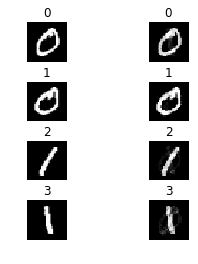

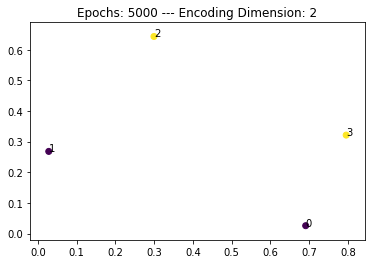

In [19]:
exp1_tensor, exp1_tensor_d, exp1_omega=x_xd_plot_compare(data,model,size)
omega=exp1_omega
label=exp1_labels


title='Epochs: '+str(EPOCH)+ ' --- Encoding Dimension: '+str(rdim) 
df_omega=pd.DataFrame(omega.numpy(),columns=['x','y'])

plt.scatter('x', 'y', data=df_omega, marker='o', c=label)
plt.title(title)
for i in range(0,len(label)):
    txt=str(i)
    plt.annotate(txt, (df_omega['x'][i], df_omega['y'][i]))

## Experiment #2- RandEnc Specified Images

### Run Code

In [25]:
indices=[0, 1, 5923, 5924]
data_2, labels_2= get_randenc_byindex(indices,labelset, dataset,rdim)
print(indices)

[0, 1, 5923, 5924]


In [26]:
data_2.x[0].shape

torch.Size([784])

In [27]:
EPOCH=5000
size=4
start_time = time.time()
lossvec, lossvec_cnt, model=train_1L(EPOCH,data_2,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####

exp2_lossvec=lossvec
exp2_lossvec_cnt=lossvec_cnt
exp2_labels=labels
exp2_model=model

--- train mins %---
0.1469399094581604


### Plot Results

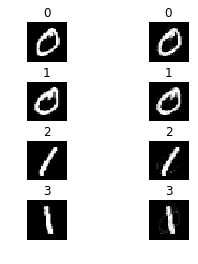

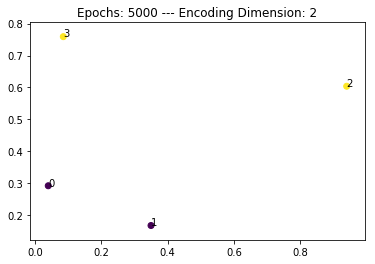

In [28]:
###############################################################################################################################
## UPDATE
exp2_tensor, exp2_tensor_d, exp2_omega=x_xd_plot_compare(data_2,model,size)
omega=exp2_omega
label=exp2_labels

###############################################################################################################################
title='Epochs: '+str(EPOCH)+ ' --- Encoding Dimension: '+str(rdim) 
df_omega=pd.DataFrame(omega.numpy(),columns=['x','y'])

plt.scatter('x', 'y', data=df_omega, marker='o', c=label)
plt.title(title)
for i in range(0,len(label)):
    txt=str(i)
    plt.annotate(txt, (df_omega['x'][i], df_omega['y'][i]))

## Experiment #3- Specific Encodings And Images

### Run Code

In [51]:
embedding=np.matrix([[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
[1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1],
[1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1],
[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1],
[1, -1, -1, -1,-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1]])
embedding=embedding.transpose()

In [52]:
img_return_cnt=np.zeros(10)
img_return_cnt[0]=8
img_return_cnt[1]=8
img_return_cnt[2]=0
img_return_cnt[3]=0
img_return_cnt[4]=0
img_return_cnt[5]=0
img_return_cnt[6]=0
img_return_cnt[7]=0
img_return_cnt[8]=0
img_return_cnt[9]=0

In [53]:
indices=get_images(img_return_cnt,labelset, dataset)

In [54]:
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930]


In [55]:
data_3, labels_3=get_enc_img(indices,labelset, dataset,embedding)

In [56]:
print(labels_3)
print(data_3.x[0].shape)
print(data_3.randEnc[0].shape)

[tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64), tensor(1., dtype=torch.float64)]
torch.Size([784])
torch.Size([6])


In [57]:
EPOCH=1000000
size=16
start_time = time.time()
lossvec, lossvec_cnt, model=train_1L6D(EPOCH,data_3,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####

exp3_lossvec=lossvec
exp3_lossvec_cnt=lossvec_cnt
exp3_labels=labels
exp3_model=model

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
--- train mins %---
145.79423181613285


### Plot Results

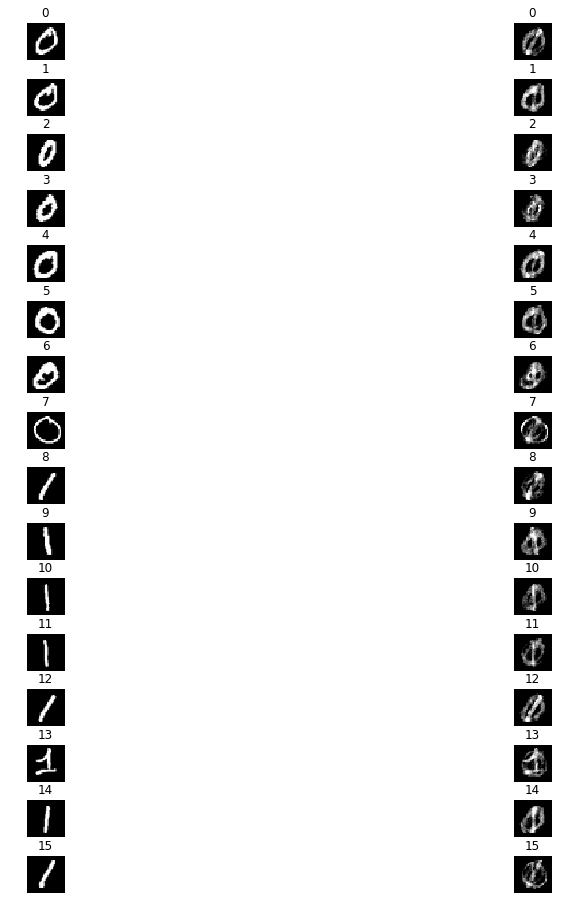

In [58]:
###############################################################################################################################
## UPDATE
exp3_tensor, exp3_tensor_d, exp3_omega=x_xd_plot_compare(data_3,model,size)
omega=exp3_omega
label=exp3_labels

## Experiment #4- Random Encodings And Specific Images-6D

### Run Code

In [23]:
indices=[0, 1, 2, 3, 4, 5, 6, 7, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930]

In [30]:
data_4, labels_4=get_randenc_byindex(indices, labelset, dataset,6)

In [45]:
EPOCH=1000000
size=16
start_time = time.time()
lossvec, lossvec_cnt, model=train_1L6D(EPOCH,data_4,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###########################################################################################
####   UPDATE INPUTS
####

exp4_lossvec=lossvec
exp4_lossvec_cnt=lossvec_cnt
exp4_labels=labels_4
exp4_model=model

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
--- train mins %---
144.6289988398552


### Plot Results

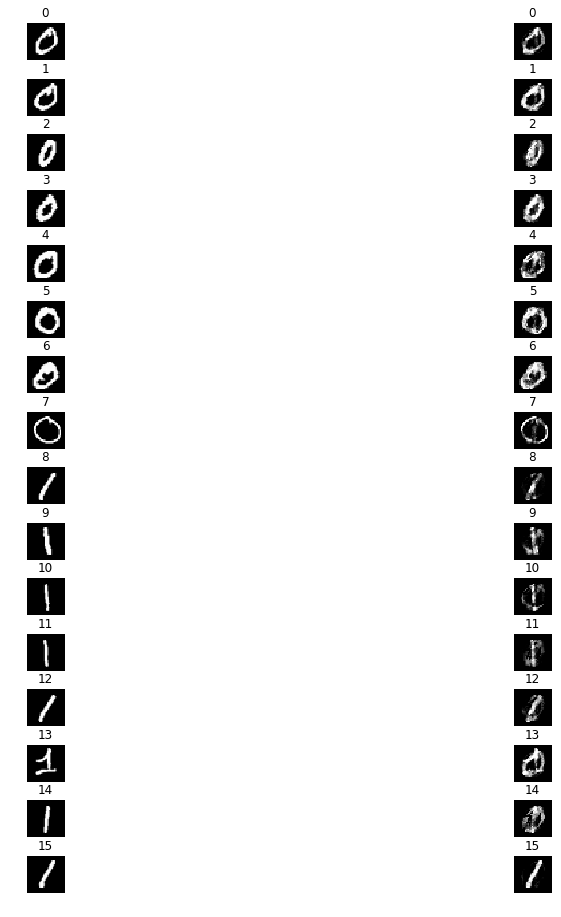

In [46]:
exp4_tensor, exp4_tensor_d, exp4_omega=x_xd_plot_compare(data_4,model,size)
omega=exp4_omega
label=exp4_labels

## Experiment #5- AE 

### Run Code

In [19]:
indices=[0, 1, 2, 3, 4, 5, 6, 7, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930]

In [22]:
data_5, labels_5=get_randenc_byindex(indices, labelset, dataset,6)

In [ ]:
EPOCH=1000000
size=16
start_time = time.time()
lossvec, lossvec_cnt, model=train_AE1(EPOCH,data_5,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
print('Final Loss')
print(loss_vec[999999])
######################################

###########################################################################################
####   UPDATE INPUTS
####

exp5_lossvec=lossvec
exp5_lossvec_cnt=lossvec_cnt
exp5_labels=labels_5
exp5_model=model

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000


### Plot Results

In [ ]:
###############################################################################################################################
## UPDATE
exp5_tensor, exp5_tensor_d, exp5_omega=x_xd_plot_compare(data_5,model,size)
omega=exp5_omega
label=labels_5